In [678]:
# import os to load data.txt
import os
# import numpy for matrices
import numpy as np
# import pandas for statistics
import pandas as pd
# import matplotlib for plots
import matplotlib.pyplot as plt
%matplotlib inline

In [679]:
# prepare data for pandas
path = os.getcwd() + '/' + 'data.txt'
data = pd.read_csv(path, header=None, names=['X', 'Y'])
data

,X,Y
0,0.0,1.0
1,1.0,3.0
2,2.0,7.0
3,3.0,13.0
4,4.0,21.0


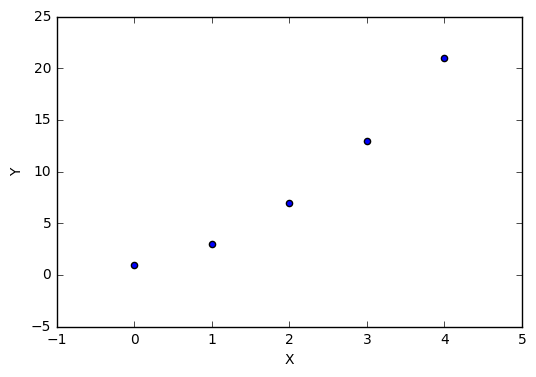

In [680]:
# plot data
data.plot(x='X', y='Y', kind='scatter')

In [681]:
def computeCost(X, y, theta):
    temp = theta
    inner = np.power(((X * temp.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [682]:
data.insert(0, 'Ones', 1)

# set training data and target variable
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

In [683]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [684]:
X.shape, theta.shape, y.shape

((5, 2), (1, 2), (5, 1))

In [685]:
computeCost(X, y, theta)

66.900000000000006

define gradient descent function where alpha is the learning rate

In [686]:

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    Wtheta = np.zeros(shape=(iters, 2))
    iter_count = 0
    

    for i in range(iters):
        err = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(err, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        Wtheta[i, 0] = theta[0,0]
        Wtheta[i,1] = theta[0,1]
        iter_count += 1
        
        m = Wtheta[i, 1]
        b = Wtheta[i, 0]
        
        if (m > 4.95 and m < 5.0 and b < -0.99 and b > -1.0):
            print("took", iter_count, " iterations to achieve 1% error relative to best fit")
            return Wtheta, cost, iter_count
   
    
    return Wtheta, cost
    

In [687]:
# initialize variables for learning rate and iterations
# after call the gradient descent function to compute
# costs and weights
alpha = 0.01
iters = 5000

# apply gradient percent until 1% error is reached
W, cost, iter_count = gradientDescent(X, y, theta, alpha, iters)
iters = iter_count

took 1841  iterations to achieve 1% error


In [688]:
x = np.linspace(data.X.min(), data.X.max(), 10)

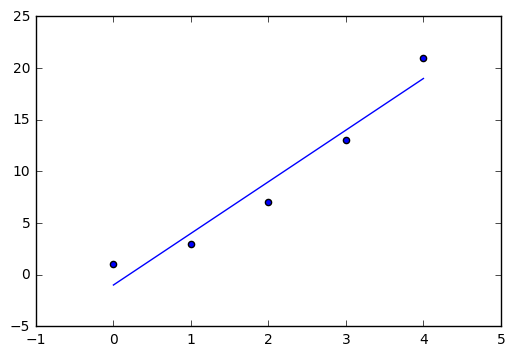

y =  4.99649328309 x +  -0.990003117847
percent error: 0.053030937407


In [689]:
# plot data and regression line together
m = W[iters-1, 1]
b = W[iters-1, 0]
X = np.array([0, 1.0, 2.0, 3.0, 4.0])
Y = np.array([1.0, 3.0, 7.0, 13.0, 21.0])
yhat = m * X + b

plt.scatter(X, Y)
plt.plot(X, yhat)
plt.show()

# show derived regression line
print ("y = ", m, "x + ", b)

# show final percent error
r1 = Y - yhat
r2 = Y - Y.mean()
r_squared = 1 - r1.dot(r1) / r2.dot(r2) 
print ("percent error:", 1 - r_squared)